<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/week1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pandas 기초 알아보기

In [ ]:
import numpy as np

f1 = np.array([6.1, 2.8, 4.7, 1.2])
w = np.array([0.043, 0.754, -0.767, 1.860])
c = f1*w
np.sum(c)

1.0006

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv('housing.csv')

In [ ]:
housing.head(10) # 위에서 10개 정보 읽기

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.iloc[50] # 위에서 50번째 데이터만 읽어서 column에 따라 보여주기

longitude              -122.27
latitude                 37.82
housing_median_age          21
total_rooms                896
total_bedrooms             453
population                 735
households                 438
median_income           0.9218
median_house_value      171900
ocean_proximity       NEAR BAY
Name: 50, dtype: object

In [ ]:
housing.size # 데이터 사이즈 크기 반환. 즉 데이터 갯수 반환

206400

In [ ]:
housing.shape # 행/열의 각 사이즈를 반환

(20640, 10)

In [ ]:
housing.info()  # housing이라는 dataset의 자세한 정보를 볼 수 있음. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 2. 데이터를 시각화해서 표현하기

In [13]:
import matplotlib
import matplotlib.pyplot as plt

col_list = list(housing)
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [14]:
col_list.remove('ocean_proximity')

In [15]:
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


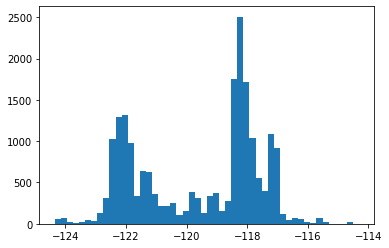

In [16]:
hist = plt.hist(housing['longitude'], bins=50)

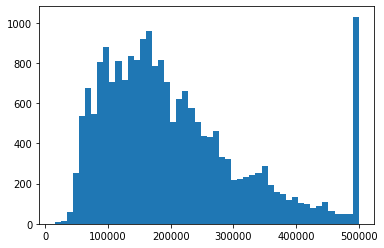

In [17]:
hist = plt.hist(housing['median_house_value'], bins = 50)

col: longitude


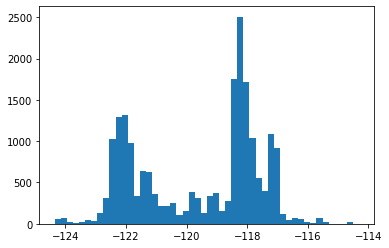

col: latitude


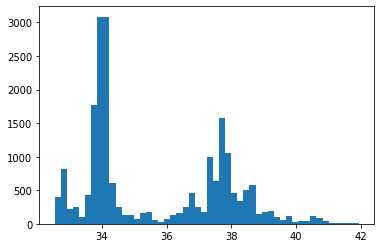

col: housing_median_age


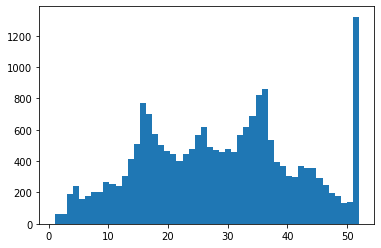

col: total_rooms


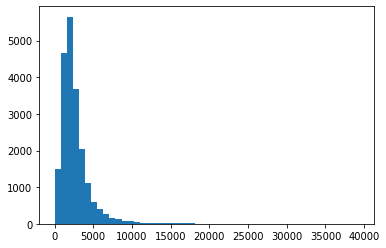

col: total_bedrooms


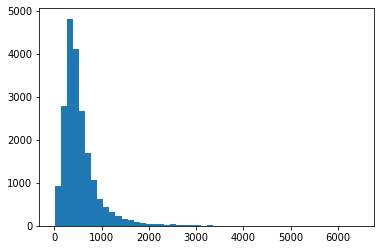

col: population


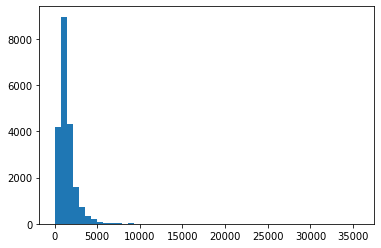

col: households


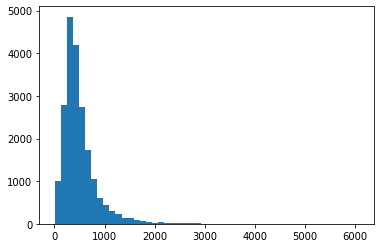

col: median_income


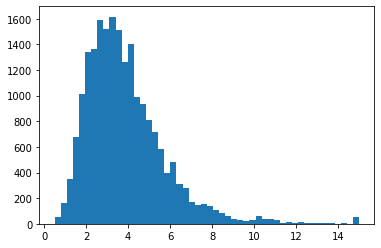

col: median_house_value


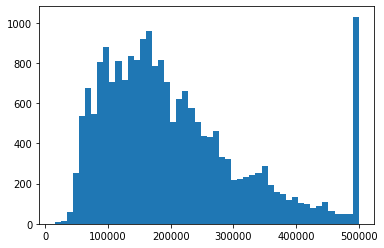

In [21]:
for col in col_list:
  print('col: ' + col)
  hist = plt.hist(housing[col],bins=50)
  plt.show()

# 3. matplotlib를 활용하여 복잡한 데이터 시각화 하기

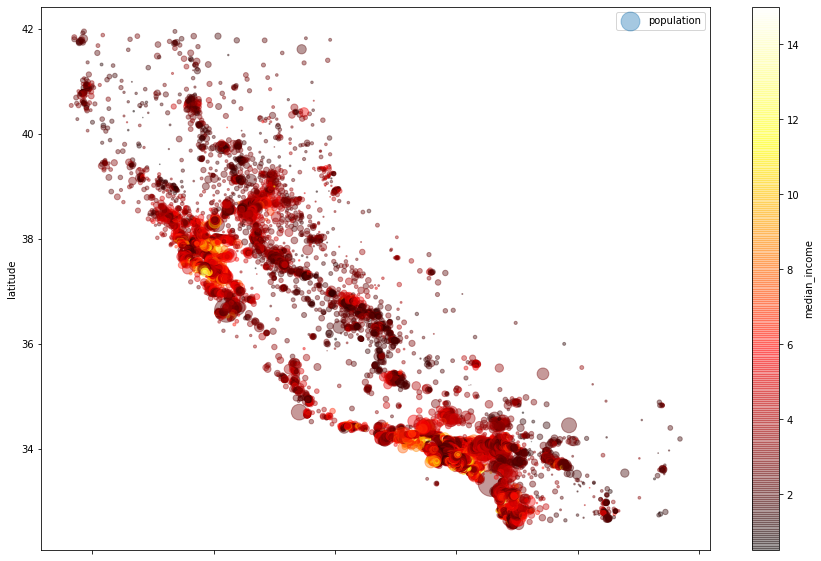

In [30]:
housing.plot(kind="scatter",                  # 종류
             x = "longitude",                 # x축
             y = "latitude",                  # y축
             alpha = 0.4,                     # 투명도
             s = housing["population"]/50,    # 표시 면적
             label = "population",            # 점 크기에 대한 범례
#             figsize = (10,7),                # 전체 plot의 크기  
             figsize = (15,10),                # 전체 plot의 크기  
#             c = "median_house_value",        # 색상 반영 변수
             c = "median_income",        # 색상 반영 변수
#             cmap = plt.get_cmap("jet"),      # 색상 반영 옵션
             cmap = plt.get_cmap("hot"),      # 색상 반영 옵션
             colorbar=True)                   # 색상에 따른 값 범례 표시

# 4. 데이터가 가지고 있는 정보(feature) 사이의 관계 살펴보기

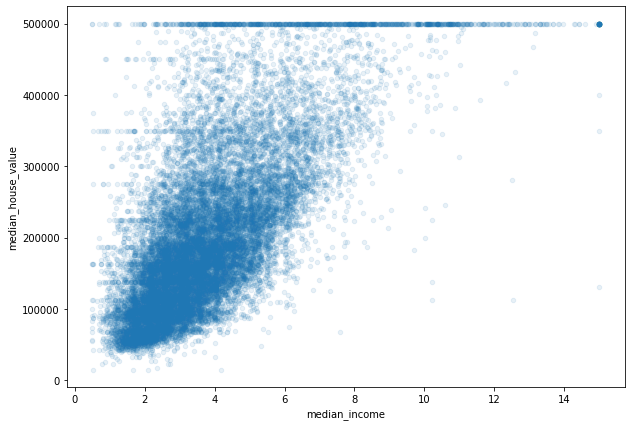

In [31]:
housing.plot(
    kind = "scatter",
    x = "median_income",
    y = "median_house_value",
    alpha = 0.1,
    figsize = (10,7)
)

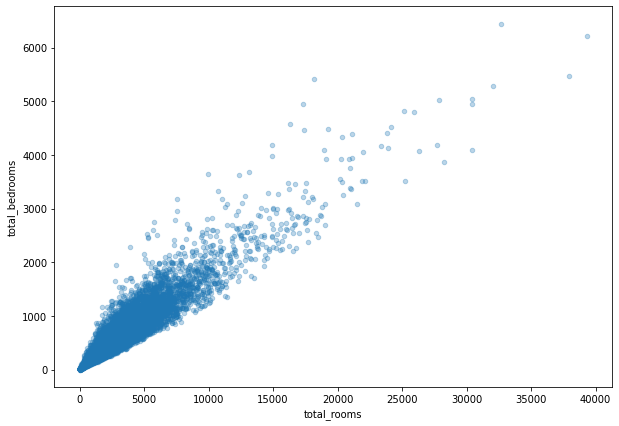

In [32]:
housing.plot(
    kind = "scatter",
    x = "total_rooms",
    y = "total_bedrooms",
    alpha = 0.3,
    figsize = (10,7)
)

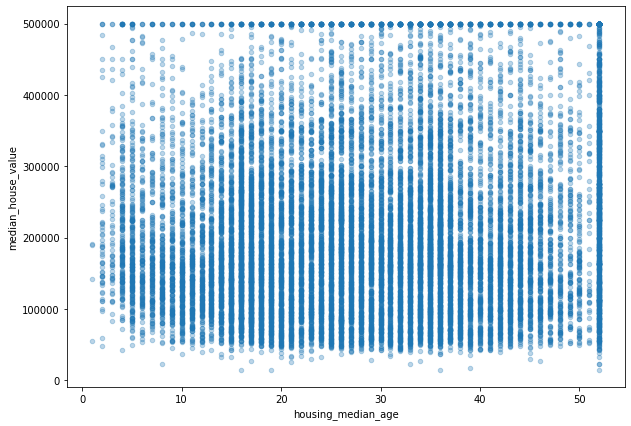

In [33]:
housing.plot(
    kind = "scatter",
    x = "housing_median_age",
    y = "median_house_value",
    alpha = 0.3,
    figsize = (10,7)
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b17c0f50>,
      dtype=object)

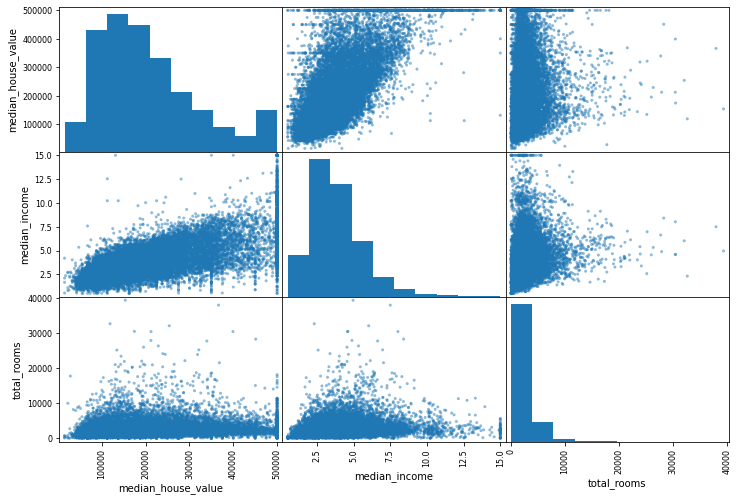

In [34]:
from pandas.plotting import scatter_matrix

attribute = ['median_house_value', 'median_income', 'total_rooms']
scatter_matrix(housing[attribute], figsize = (12,8))     # attribute 내부에 있는 변수들로 x,y를 구성하여 모든 경우의 수를 그래프로 그려서 보여준다. 

# 5. median_house_value 정보와 다른 정보가 얼마나 연관이 큰지 확인하기

In [36]:
corr_matrix = housing.corr()

corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# 6. 학습 데이터 전처리 과정

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
del housing['total_rooms']
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_bedrooms       20640 non-null  float64
 4   population           20640 non-null  float64
 5   households           20640 non-null  float64
 6   median_income        20640 non-null  float64
 7   median_house_value   20640 non-null  float64
 8   ocean_proximity      20640 non-null  object 
 9   rooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']
del housing['total_bedrooms']
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20640 non-null  float64
 1   latitude                20640 non-null  float64
 2   housing_median_age      20640 non-null  float64
 3   population              20640 non-null  float64
 4   households              20640 non-null  float64
 5   median_income           20640 non-null  float64
 6   median_house_value      20640 non-null  float64
 7   ocean_proximity         20640 non-null  object 
 8   rooms_per_household     20640 non-null  float64
 9   bedrooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_list = list(housing)
col_list.remove('ocean_proximity')
col_list.remove('median_house_value')

In [44]:
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)

result = pd.DataFrame(housing_scaled, index = housing_numeric.index, columns = housing_numeric.columns)
housing = pd.concat([result, housing['median_house_value'], housing['ocean_proximity']], axis = 1)  
housing.head() 

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_household,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-0.148514,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.248542,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-0.052902,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.053647,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.038196,342200.0,NEAR BAY


In [45]:
housing = pd.get_dummies(housing)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_household,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-0.148514,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.248542,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-0.052902,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.053647,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.038196,342200.0,0,0,0,1,0
